In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from test import crop_image, build_grid

[[551, 405], [72, 392], [566, 55], [65, 50]]


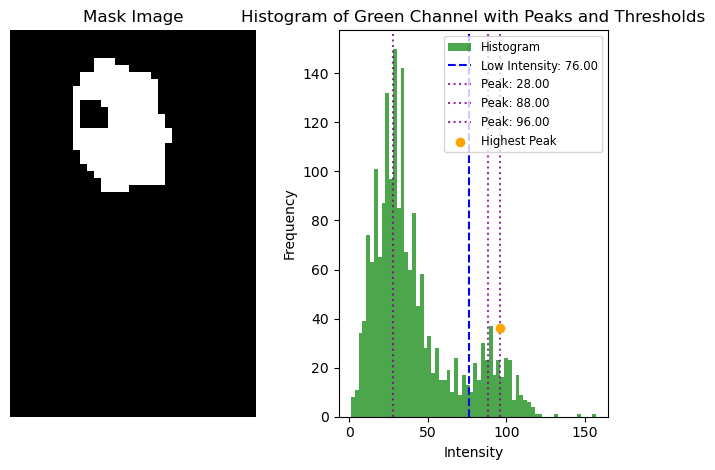

In [29]:
STATIC_IMAGE_PATH = "../data/images_02_12/MW_G30_05_Extrafilter.jpg"
image = cv2.imread(STATIC_IMAGE_PATH)
imageInputRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imageInputRGB = crop_image(imageInputRGB)

ROW_LABELS = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
COLUMN_NUMBERS = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
cell_data = {f"{row}{col}": {"state": None,"comment": ""} for row in ROW_LABELS for col in COLUMN_NUMBERS}
cell_data, grid_mask = build_grid(imageInputRGB, cell_data)

hist, bin_edges = np.histogram(cell_data["A1"]["cell_image"][:,:,1].ravel(), bins=64, range=(0, 256))
peaks, _ = find_peaks(hist, height=10)
first_x_peak = peaks[-1]
peak_height = hist[peaks[-1]]
threshold = peak_height * 0.8
low_idx = np.where(hist[:first_x_peak] < threshold)[0][-1] if len(np.where(hist[:first_x_peak] < threshold)[0]) > 0 else 0
high_idx = np.where(hist[first_x_peak:] < threshold)[0][0] + first_x_peak if len(np.where(hist[first_x_peak:] < threshold)[0]) > 0 else 255
low_intensity = bin_edges[low_idx]

mask = (cell_data["A1"]["cell_image"][:,:,1] >= low_intensity)
kernel = np.ones((3, 3), np.uint8)  
mask = cv2.erode(mask.astype(np.uint8), kernel, iterations=1)
cell_data["A1"]["mask"] = mask
cell_data["A1"]["mean_green"] = np.mean(cell_data["A1"]["cell_image"][:, :, 1][mask == 1])

plt.subplot(1, 2, 1)
plt.imshow(cell_data["A1"]["mask"], cmap='gray')
plt.title('Mask Image')
plt.axis('off')

# Plot the histogram of the green channel
plt.subplot(1, 2, 2)
plt.hist(cell_data["A1"]["cell_image"][:, :, 1].ravel(), bins=64, color='green', alpha=0.7, label="Histogram")
plt.axvline(x=low_intensity, color='blue', linestyle='--', label=f'Low Intensity: {low_intensity:.2f}')
for peak in peaks:
    plt.axvline(x=bin_edges[peak], color='purple', linestyle=':', alpha=0.8, label=f'Peak: {bin_edges[peak]:.2f}')
plt.scatter(bin_edges[peaks[-1]], peak_height, color='orange', label="Highest Peak", zorder=3)

plt.title('Histogram of Green Channel with Peaks and Thresholds')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()

[[567, 383], [577, 40], [76, 45], [87, 396]]


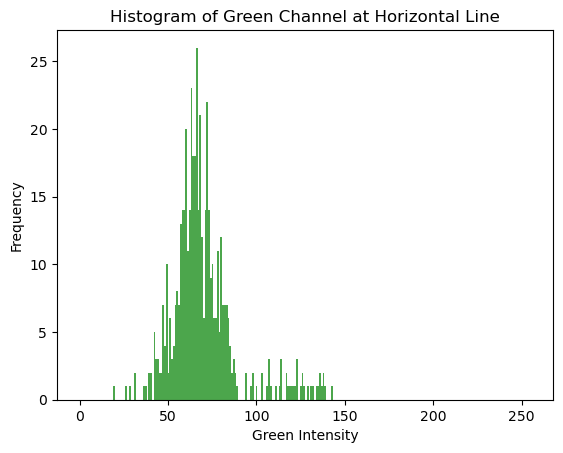

In [18]:
STATIC_IMAGE_PATH = "../data/images_07_11/141914.jpg"
image = cv2.imread(STATIC_IMAGE_PATH)
imageInputRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imageInputRGB = crop_image(imageInputRGB)
horizontal_line = 210

# Extract the green channel (index 1 in RGB)
green_values = imageInputRGB[horizontal_line, :, 1]

# Plot the histogram
plt.hist(green_values, bins=256, range=(0, 255), color='green', alpha=0.7)
plt.title('Histogram of Green Channel at Horizontal Line')
plt.xlabel('Green Intensity')
plt.ylabel('Frequency')
plt.show()